<a href="https://colab.research.google.com/github/chottokun/colaboratory/blob/main/GoogleTrends__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ライブラリ
!pip install pytrends
!pip install statsmodels
!pip install japanize-matplotlib

In [2]:
# import
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd
from pytrends.request import TrendReq
from pytrends.exceptions import ResponseError
import statsmodels.api as sm
import time


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 参考
# https://pypi.org/project/pytrends/
# https://qiita.com/takubb/items/e5578a8143a4f6b0f7fc

pytrend = TrendReq(hl='ja-jp',tz=540,retries=10)

In [4]:
def GetPytrends(kw_list, timeframe ="today 5-y", geo=""):
  '''
  kw_list:keywods (4つ以下)
  デフォルト値
    timeframe:"today 5-y"
    geo=""
  '''

  while True:
    try:
      pytrend.build_payload(kw_list, timeframe=timeframe, geo=geo, gprop='', cat=0)
      df = pytrend.interest_over_time()
    except Exception as e:
        print("Failed.")
        time.sleep(10)
    else:
        print("Interest. Done.")
        break


  # 結果に含まれていれば、isPartial削除

  if 'isPartial' in df.columns:
    del df['isPartial']

  while True:
    try:
      topics = pytrend.related_queries()
    except Exception as e:
        print("Failed.")
        time.sleep(10)
    else:
        print("Related. Done.")
        break

  return df, topics

# 地域と検索期間、キーワード
GEO="JP"
TFRAME='today 3-m'

kw_list1 = ['COVID', 'コロナ', 'ワクチン']
kw_list2 = ['感染者数', '緊急事態宣言', '死者数']

# 検索(トピックは最近のものが常に帰ってくる）
df1, topics = GetPytrends(kw_list1, timeframe =TFRAME, geo="")
time.sleep(10)
df2, topics2  = GetPytrends(kw_list2, timeframe =TFRAME, geo="")

# 結合
df = pd.concat([df1, df2], axis=1)
topics.update(topics2)

Interest. Done.
Related. Done.
Interest. Done.
Related. Done.


<Figure size 432x288 with 0 Axes>

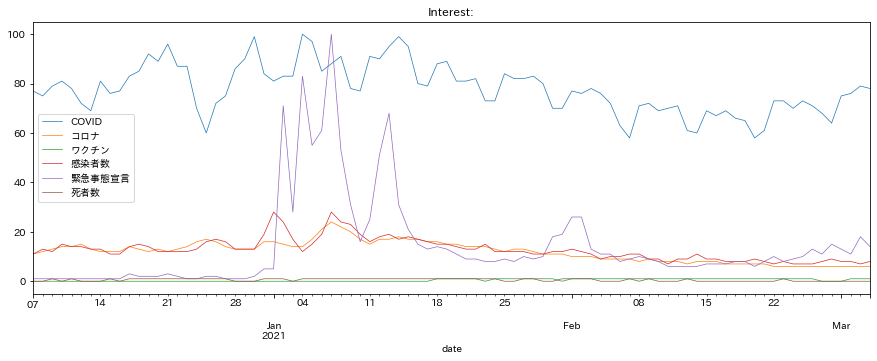

In [5]:
# グラフ
fig = plt.figure()
df.plot(figsize=(15, 5), lw=.7)
plt.title('Interest:')
plt.show()
plt.close()

In [6]:
# topとrisingをそれぞれ見る。
topics[kw_list1[1]]['top']

,query,value
0,コロナ 感染,100
1,コロナ 感染 者,82
2,コロナ 東京,54
3,コロナ ウイルス,49
4,コロナ 感染 者 数,34
5,新型 コロナ,31
6,新型 コロナ ウイルス,18
7,大阪 コロナ,18
8,コロナ ワクチン,15
9,コロナ 症状,14


In [7]:
topics[kw_list1[1]]['rising']

,query,value
0,コロナ 変異 種,26700
1,年賀状 一 言,3000
2,八女 市 コロナ,950
3,鹿屋 市 コロナ,700
4,登米 市 コロナ,500
5,飯田 市 コロナ,450
6,コロナ 緊急 事態 宣言,450
7,緊急 事態 宣言,400
8,高山 市 コロナ,350
9,長崎 コロナ 速報,300


In [8]:
# 検索トップを纏めてDataFrameに
df_rising = pd.DataFrame()

for k in df.columns:
  df_rising_ = pd.DataFrame.from_dict(topics[k]['top'])
  df_rising_['keyword'] = k
  df_rising = pd.concat([df_rising, df_rising_], axis=0)

df_rising.to_csv('top.csv')
df_rising

,query,value,keyword
0,covid 19,100,COVID
1,vaccine covid,73,COVID
2,test covid,40,COVID
3,covid cases,28,COVID
4,covid testing,27,COVID
...,...,...,...
20,コロナ ウイルス 死者 数 世界,4,死者数
21,インフルエンザ 死者 数 厚生 労働省,3,死者数
22,第 二 次 世界 大戦 死者 数,3,死者数
23,東日本 大震災 死者 数,3,死者数


In [9]:
# 急上昇ワードを纏めてDataFrameに
df_top = pd.DataFrame()

for k in df.columns:
  df_top_ = pd.DataFrame.from_dict(topics[k]['top'])
  df_top_['keyword'] = k
  df_top = pd.concat([df_top, df_top_], axis=0)

df_top.to_csv('raging.csv')

キーワード：COVID


<Figure size 432x288 with 0 Axes>

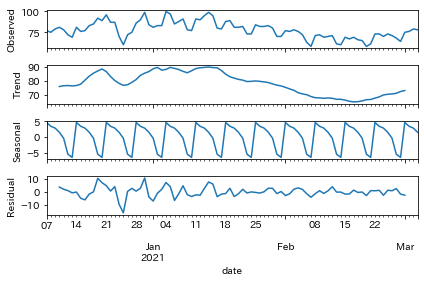

キーワード：コロナ


<Figure size 432x288 with 0 Axes>

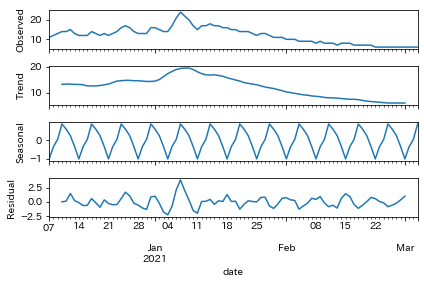

キーワード：ワクチン


<Figure size 432x288 with 0 Axes>

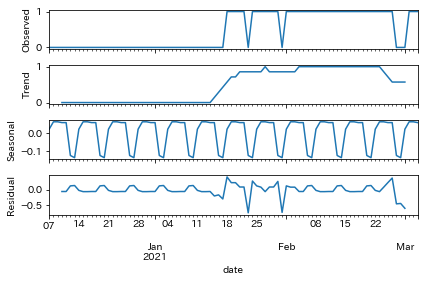

キーワード：感染者数


<Figure size 432x288 with 0 Axes>

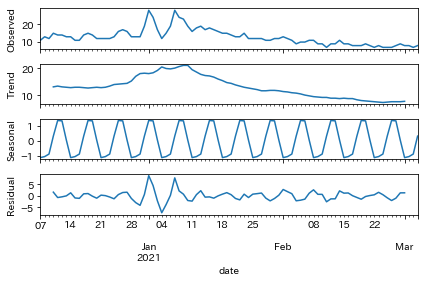

キーワード：緊急事態宣言


<Figure size 432x288 with 0 Axes>

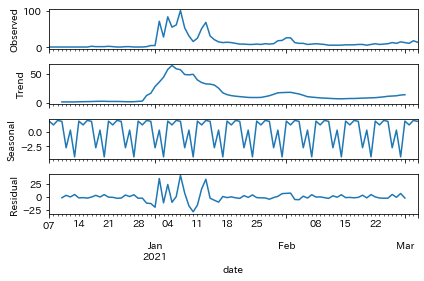

キーワード：死者数


<Figure size 432x288 with 0 Axes>

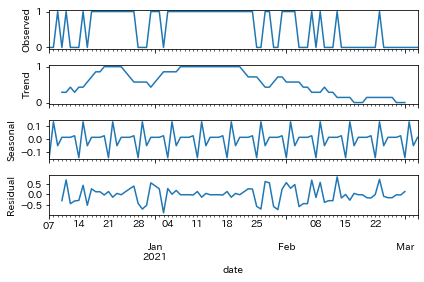

In [10]:
# それぞれの周期性を評価
for k in df.columns:
  print("キーワード："+k)
  res = sm.tsa.seasonal_decompose(df[k])

  fig = plt.figure()
  res.plot()

  plt.show()
  plt.savefig('sm_'+k+'_decompose.png', format="png", dpi=300)
  plt.close()

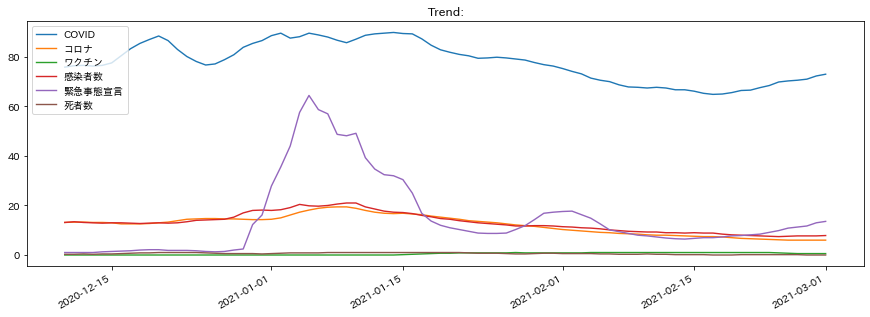

In [11]:
# 周期性を取り除いたトレンドをグラフに

seasonality = pd.DataFrame()

for i in df.columns:
    res = sm.tsa.seasonal_decompose(df[i], freq=7)
    res_ = pd.Series(res.trend, name=i)
    seasonality = pd.concat([seasonality, res_], axis=1)
    
seasonality.plot(figsize=(15, 5), lw=1.4)
plt.legend(loc="upper left")
plt.title("Trend:")
plt.savefig('trend_sm.png', format="png", dpi=300)
plt.show()
plt.close()

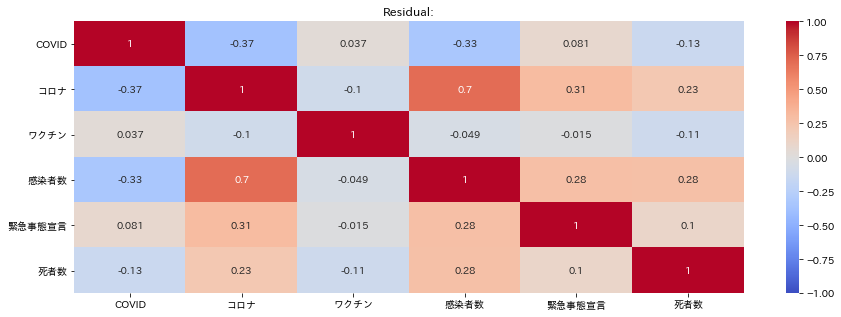

In [12]:
# Residualのヒートマップ

resid = pd.DataFrame()

for i in df.columns:
    res = sm.tsa.seasonal_decompose(df[i], freq=7)
    res_ = pd.Series(res.resid, name=i)
    resid = pd.concat([resid, res_], axis=1)

cor_matrix = resid.corr()

plt.figure(figsize=(15, 5))
plt.title("Residual:")
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.savefig('Residual_hm.png', format="png", dpi=300)
plt.show()
plt.close()

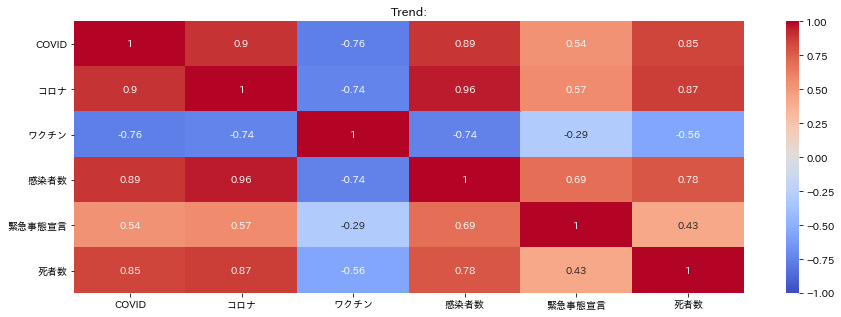

In [13]:
# トレンドのヒートマップ
res_trend = pd.DataFrame()

for i in df.columns:
    res = sm.tsa.seasonal_decompose(df[i], freq=7)
    res_ = pd.Series(res.trend, name=i)
    res_trend = pd.concat([res_trend, res_], axis=1)

cor_matrix = res_trend.corr()

plt.figure(figsize=(15, 5))
plt.title("Trend:")
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.savefig('Trend_hm.png', format="png", dpi=300)
plt.show()
plt.close()

In [14]:
from google.colab import files
import glob

for fn in glob.glob("./*.png"):
  files.download(fn)

for fn in glob.glob("./*.csv"):
  files.download(fn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>